# Introduction to SciKitLearn

- Classification: Categorizing examples into groups
- Numeric prediction: Assigning numbers to examples

## Numeric prediction

- Predicting numeric values, also called regression


Imports

In [34]:
import pandas as pd
import numpy as np                    # to generate grids and vectors

# algorithms
from sklearn import dummy
from sklearn import linear_model
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

# evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

# plotting
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure            # for setting the figure size

Load the data

In [35]:
csvFileName = r"./age-height.csv"
df = pd.read_csv(csvFileName)
print("data shape: ", df.shape)
print(df.head())

# for visualization purposes, we create X data with values 1, 2, ..., 100 to be used for prediction
X_viz = np.arange(1, 100, 1).reshape(-1, 1)  # reshape to create a column vector for scikit-learn


data shape:  (200, 3)
        Age Gender  Height
0  0.000000      M      54
1  0.000000      F      45
2  0.083333      M      55
3  0.083333      F      53
4  0.166667      M      57


### Input and output, Train- test split

In [36]:
""" Input and output """
feature_cols = ['Age']
target_var = 'Height'

X = df[feature_cols] #.values
y = df[target_var] #.values

""" Train-test split """
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
                                                                  # 10% of data for evaluation


In [37]:
y_train.describe()

count    180.000000
mean     144.472222
std       41.076632
min       45.000000
25%      117.250000
50%      160.500000
75%      174.250000
max      194.000000
Name: Height, dtype: float64

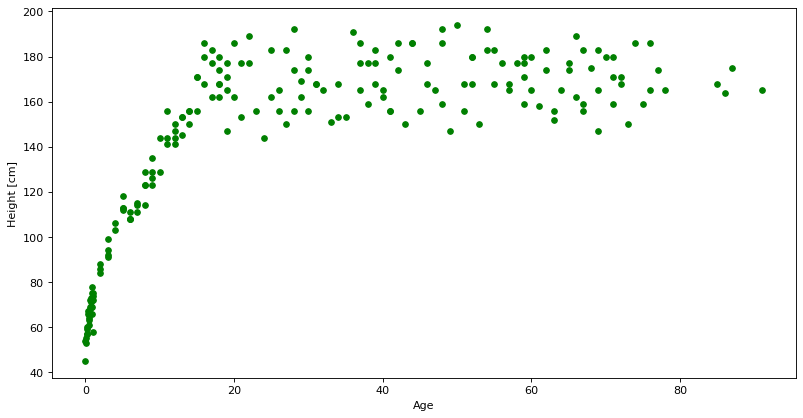

In [38]:
figure(figsize=(12, 6), dpi=80)
plt.plot(df.Age, df.Height, marker='o', linestyle='', c = 'green', markersize=5)
plt.xlabel("Age")
plt.ylabel("Height [cm]")
plt.show()

### Baseline
What was the baseline we used in classification?

What would be a an equivalent baseline for numeric prediction?

</br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br>

The "Dummy" baseline predictor does not look at the input data at all, only at the output.

In [39]:
y_train.describe()

count    180.000000
mean     144.472222
std       41.076632
min       45.000000
25%      117.250000
50%      160.500000
75%      174.250000
max      194.000000
Name: Height, dtype: float64

In [40]:
y_mean = y_train.mean()
y_num = y_test.shape[0]

In [41]:

dummy_height = np.ones(y_num).reshape(-1, 1) * y_train.mean()    # a vector of ones, transposed, multiplied by training set mean

In [42]:
dummy_height

array([[144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222],
       [144.47222222]])

### Mean squared error

In [43]:
dummy_mse = metrics.mean_squared_error(y_test, dummy_height)
dummy_mse

926.5868827160493

What is the unit of the MSE (mean squared error)?
</br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br>

### Dummy Regressor
Scikit has a speciall class for the baseline regressor called ```DummyRegressor```. This regressor is useful as a simple baseline to compare with other (real) regressors. Do not use it for real problems.


In [44]:
dum = dummy.DummyRegressor()
dum.fit(X_train, y_train)
y_pred = dum.predict(X_test)
y_pred

array([144.47222222, 144.47222222, 144.47222222, 144.47222222,
       144.47222222, 144.47222222, 144.47222222, 144.47222222,
       144.47222222, 144.47222222, 144.47222222, 144.47222222,
       144.47222222, 144.47222222, 144.47222222, 144.47222222,
       144.47222222, 144.47222222, 144.47222222, 144.47222222])

In [45]:
# Store the actual data and the predictions in a DataFrame for later
heights_test = pd.DataFrame()
heights_test["Age"] = X_test["Age"]
heights_test["Actual_height"] = y_test
heights_test["Dummy_height"] = y_pred

In [46]:
heights_test

,Age,Actual_height,Dummy_height
95,23.000000,156,144.472222
15,0.583333,68,144.472222
30,2.000000,88,144.472222
158,57.000000,168,144.472222
128,40.000000,165,144.472222
115,34.000000,153,144.472222
69,14.000000,150,144.472222
170,63.000000,152,144.472222
174,66.000000,162,144.472222
45,7.000000,111,144.472222


In [47]:
# This is equivalent to the code above, just formatted a little bit
print("Dummy MSE  \t{0:5.2f}".format( metrics.mean_squared_error(heights_test["Actual_height"], heights_test["Dummy_height"])))


Dummy MSE  	926.59


What does it actually look like on the training dataset?

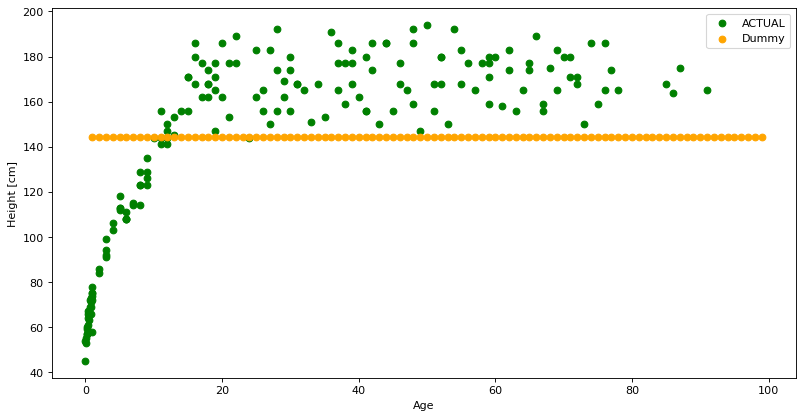

In [48]:
# Dummy regressor on the training dataset
figure(figsize=(12, 6), dpi=80)
plt.scatter(X_train["Age"], y_train, label="ACTUAL", c= "green")
plt.scatter(X_viz, dum.predict(X_viz), label = "Dummy", c="orange")
plt.xlabel("Age")
plt.ylabel("Height [cm]")
plt.legend()

### Linear Regression
... fitting a linear equation to observed data

In [49]:
regr = linear_model.LinearRegression()      # initialize
regr.fit(X_train, y_train)                  # fit
y_pred = regr.predict(X_test)               # predict

In [50]:
heights_test["Linear Regression"] = y_pred
heights_test

,Age,Actual_height,Dummy_height,Linear Regression
95,23.000000,156,144.472222,135.973234
15,0.583333,68,144.472222,110.254777
30,2.000000,88,144.472222,111.880107
158,57.000000,168,144.472222,174.981153
128,40.000000,165,144.472222,155.477193
115,34.000000,153,144.472222,148.593443
69,14.000000,150,144.472222,125.647608
170,63.000000,152,144.472222,181.864904
174,66.000000,162,144.472222,185.306779
45,7.000000,111,144.472222,117.616566


In [51]:
# Linear regression coefficients
print("Coefficients: ", regr.coef_)
print("Intercept:", regr.intercept_)

Coefficients:  [1.14729175]
Intercept: 109.58552332704824


How many coefficients are there?
What is the interpretation of each in our case?
</br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br>

/Users/blazingsun88/miniconda3/envs/ml/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


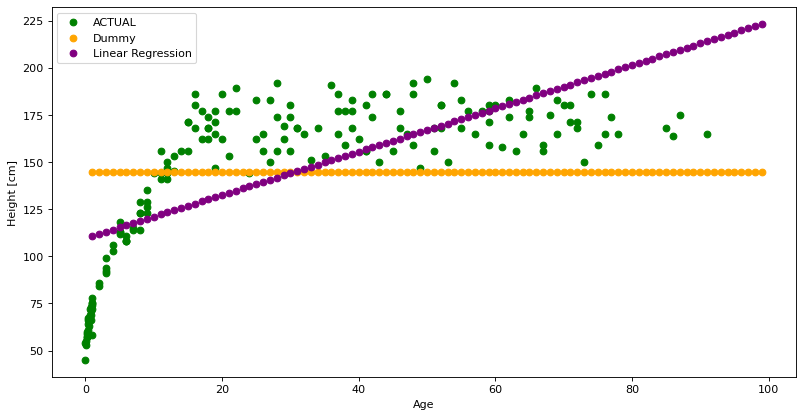

In [52]:
figure(figsize=(12, 6), dpi=80)
plt.scatter(X_train["Age"], y_train, label="ACTUAL", c= "green")
plt.scatter(X_viz, dum.predict(X_viz), label = "Dummy", c="orange")
plt.scatter(X_viz, regr.predict(X_viz), label = "Linear Regression", c="purple")
plt.xlabel("Age")
plt.ylabel("Height [cm]")
plt.legend()

Do we expect the linear regression to perform better in term of MSE as compared to Dummy?
- On the training set?
- On the test set?
</br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br>

In [53]:
mse = metrics.mean_squared_error(heights_test["Actual_height"], heights_test["Linear Regression"])
print("Linear regression MSE  \t{0:5.2f}".format(mse))


Linear regression MSE  	763.00


### Regression tree
Similar to TDIDT, but predicts numeric values.


In [54]:
reg_tree = tree.DecisionTreeRegressor(min_samples_leaf=25) # try including , max_depth=2
reg_tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,25
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


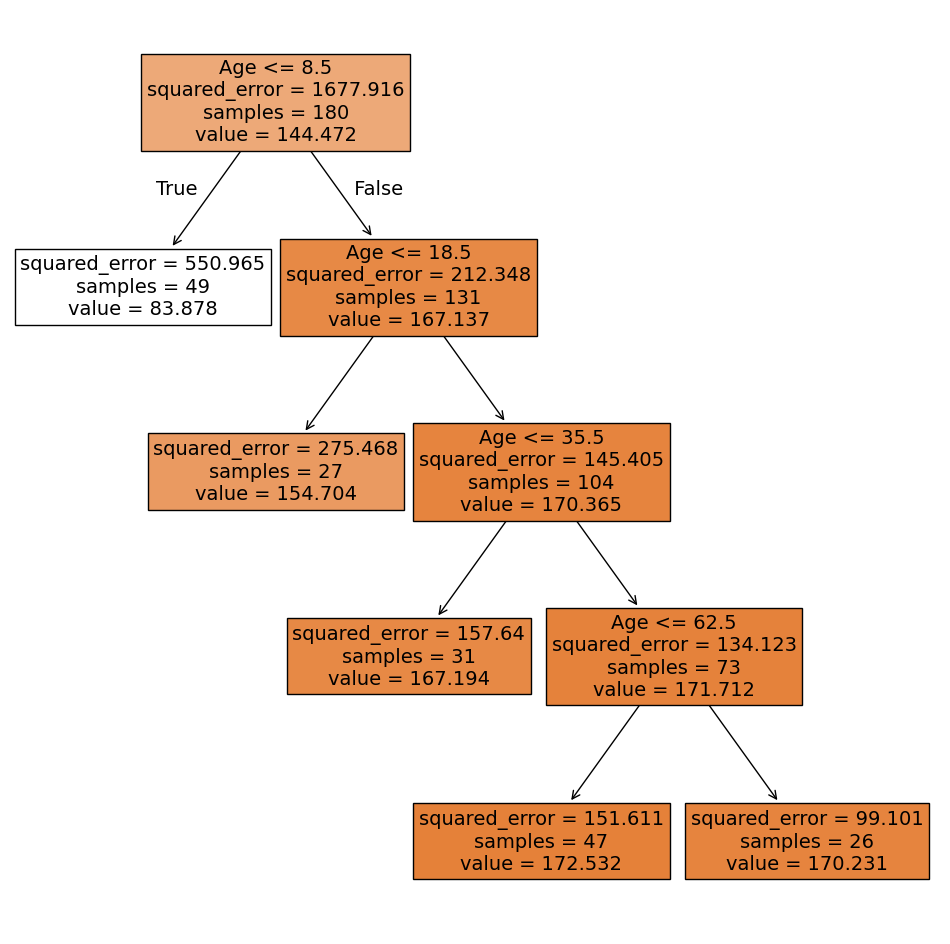

In [55]:
# plot tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(decision_tree= reg_tree, fontsize=14, feature_names=feature_cols, filled=True)
plt.show()

- How does the tree predict a value?
- What is the criteria for choosing the best attribute?
- What is the stopping critria when building a regression tree?

they use a criteria that, the values in the new group has smaller variance than the old group. Each node always splits into 2
</br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br>

In [56]:
y_pred = reg_tree.predict(X_test)
heights_test["Regression Tree"] = y_pred
heights_test[["Age", "Regression Tree"]]

,Age,Regression Tree
95,23.000000,167.193548
15,0.583333,83.877551
30,2.000000,83.877551
158,57.000000,172.531915
128,40.000000,172.531915
115,34.000000,167.193548
69,14.000000,154.703704
170,63.000000,170.230769
174,66.000000,170.230769
45,7.000000,83.877551


/Users/blazingsun88/miniconda3/envs/ml/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/blazingsun88/miniconda3/envs/ml/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


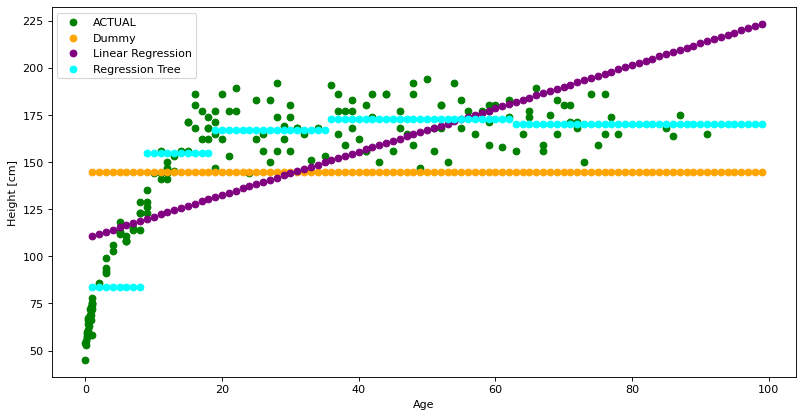

In [57]:
figure(figsize=(12, 6), dpi=80)
plt.scatter(X_train["Age"], y_train, label="ACTUAL", c= "green")
plt.scatter(X_viz, dum.predict(X_viz), label = "Dummy", c="orange")
plt.scatter(X_viz, regr.predict(X_viz), label = "Linear Regression", c="purple")
plt.scatter(X_viz, reg_tree.predict(X_viz), label = "Regression Tree", c="cyan")
plt.xlabel("Age")
plt.ylabel("Height [cm]")
plt.legend()

In [58]:
mse = metrics.mean_squared_error(heights_test["Actual_height"], heights_test["Regression Tree"])
print("Regression tree MSE  \t{0:5.2f}".format(mse))

Regression tree MSE  	246.60


Regression trees (as well as decision trees) are non-linear models. They divide the data into smaller (homogenious) parts and compute the majority/mean on that subset.
- Prone to overfitting: require regularization via e.g. reduced error prunning
- Sensitive to small changes in the data
- Interpretable
- Can be used as base-classifiers in ensembles to build stronger classifiers.


## KNN: K- Nearest Neighbours
A new data point is assigned the target value computed from it's K-nearest neighbours.

In [59]:
pd.concat([X_train, y_train], axis=1, join="inner").sort_values("Age")

,Age,Height
0,0.000000,54
1,0.000000,45
3,0.083333,53
2,0.083333,55
4,0.166667,57
...,...,...
195,78.000000,165
196,85.000000,168
197,86.000000,164
198,87.000000,175


In [60]:
knn = KNeighborsRegressor(n_neighbors=5)  # look at the 5 nearest neighbours
knn.fit(X_train, y_train)                 # remembers all the data
y_pred = knn.predict(X_test)
heights_test["KNN-5"] = y_pred

/Users/blazingsun88/miniconda3/envs/ml/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


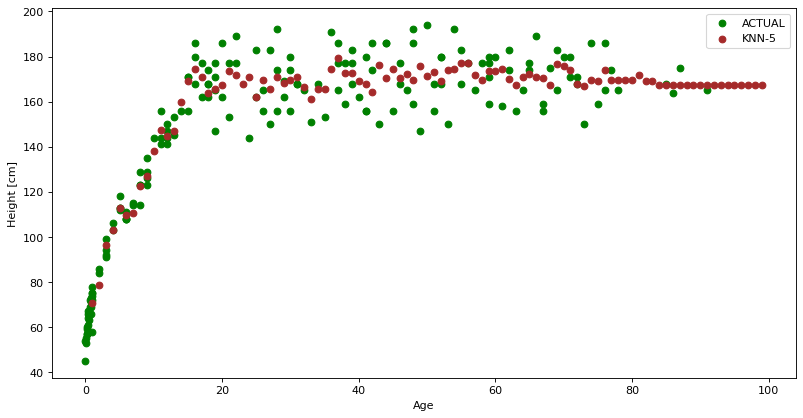

In [61]:
figure(figsize=(12, 6), dpi=80)
plt.scatter(X_train["Age"], y_train, label="ACTUAL", c= "green")
plt.scatter(X_viz, knn.predict(X_viz), label = "KNN-5", c="brown")
plt.xlabel("Age")
plt.ylabel("Height [cm]")
plt.legend()

In [62]:
mse = metrics.mean_squared_error(heights_test["Actual_height"], heights_test["KNN-5"])
print("KNN-5 MSE  \t{0:5.2f}".format(mse))

KNN-5 MSE  	137.91


'k' in KNN is a parameter that refers to the number of nearest neighbors to include in the voting process.

We can change the parameter `k` in KNN to tune how well the model fits the training data.
- What do we get by increasing k? k = 100, k = 200?
- What do we get by decreasing k to k = 1?
</br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br></br>

มึงเห็นคำ validation set, cress validatopn traing มึงคิด hyperparameter tuning เลย

|

|

We can select the optimal value of K using a validation set, or more robustly through cross-validation on the training data. In cross-validation, the training set is split into multiple folds; the model is trained and evaluated on different folds for various values of K, and the value of K that achieves the best average performance across folds is then chosen and used for the final model.

k-Nearest Neighbors (kNN) is a lazy learner, meaning it does not build an explicit model during training. Instead, it simply stores the training data and performs all computations (like distance calculations and voting) only when making predictions.

Note the similarity of setting the hyper-parameters of a decision/regression tree.

Can KNN be used for classification?

How does one find the "nearest neighbors" in multi-variate cases (more attributes)?








### All regressors together

In [63]:
heights_test.sort_values("Age")

,Age,Actual_height,Dummy_height,Linear Regression,Regression Tree,KNN-5
15,0.583333,68,144.472222,110.254777,83.877551,67.4
30,2.000000,88,144.472222,111.880107,83.877551,78.8
45,7.000000,111,144.472222,117.616566,83.877551,110.6
56,10.000000,129,144.472222,121.058441,154.703704,138.0
66,13.000000,153,144.472222,124.500316,154.703704,147.2
69,14.000000,150,144.472222,125.647608,154.703704,159.8
68,14.000000,156,144.472222,125.647608,154.703704,159.8
78,17.000000,183,144.472222,129.089483,154.703704,171.0
82,18.000000,180,144.472222,130.236775,154.703704,163.8
95,23.000000,156,144.472222,135.973234,167.193548,168.0


Which model is the best?

/Users/blazingsun88/miniconda3/envs/ml/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/blazingsun88/miniconda3/envs/ml/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/blazingsun88/miniconda3/envs/ml/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


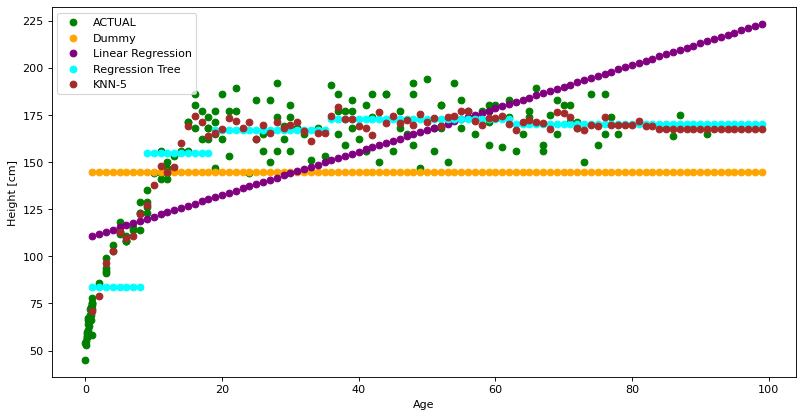

In [64]:
figure(figsize=(12, 6), dpi=80)
plt.scatter(X_train["Age"], y_train, label="ACTUAL", c= "green")
plt.scatter(X_viz, dum.predict(X_viz), label = "Dummy", c="orange")
plt.scatter(X_viz, regr.predict(X_viz), label = "Linear Regression", c="purple")
plt.scatter(X_viz, reg_tree.predict(X_viz), label = "Regression Tree", c="cyan")
plt.scatter(X_viz, knn.predict(X_viz), label = "KNN-5", c="brown")
plt.xlabel("Age")
plt.ylabel("Height [cm]")
plt.legend()


## Numeric Prediction and Evaluation (short version)

Data

In [65]:
""" Load """
csvFileName = r"./age-height.csv"
df = pd.read_csv(csvFileName)

""" Define Input and output """
feature_cols = ['Age']
target_var = 'Height'

X = df[feature_cols] #.values
y = df[target_var] #.values

""" Train-test split """
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
                                                                  # 10% of data for evaluation


Initialaze the learnars

In [66]:
dum = dummy.DummyRegressor()
regr = linear_model.LinearRegression()
reg_tree = tree.DecisionTreeRegressor(min_samples_leaf=25)
knn = KNeighborsRegressor(n_neighbors=5)

algs = {"Dummy":dum, 
        "Linear regression":regr, 
        "Regression Tree": reg_tree, 
        "KNN": knn}


Define the evaluation metrics from 
https://scikit-learn.org/stable/modules/model_evaluation.html
    

In [67]:
my_metrics = {
    'max_error': metrics.max_error,
    'mean_absolute_error': metrics.mean_absolute_error,
    'mean_squared_error': metrics.mean_squared_error,
    'r2': metrics.r2_score,
    'median_absolute_error': metrics.median_absolute_error,
    'explained_variance': metrics.explained_variance_score,
    'mean_absolute_percentage_error': metrics.mean_absolute_percentage_error}

Train and test according to all scores

In [68]:
alg_compare = pd.DataFrame()
alg_compare["Metric"] = my_metrics.keys()

for alg_name, alg in algs.items():
    alg.fit(X_train, y_train)
    y_pred = alg.predict(X_test)
    
    values = []
    for metric, m in my_metrics.items():
        values.append(m(y_test, y_pred))
    alg_compare[alg_name] = values
    
alg_compare



,Metric,Dummy,Linear regression,Regression Tree,KNN
0,max_error,76.472222,53.910517,28.296296,29.600000
1,mean_absolute_error,24.266667,23.190495,13.163284,9.860000
2,mean_squared_error,926.586883,763.001881,246.598955,137.908000
3,r2,-0.041521,0.142355,0.722813,0.844986
4,median_absolute_error,19.027778,23.593443,11.212159,9.100000
5,explained_variance,0.000000,0.143135,0.728383,0.857676
6,mean_absolute_percentage_error,0.198403,0.168668,0.093954,0.064595


## Exercises
1. Include the gender attribute into X and check how it impacts the performance of the models.
2. Use a validation set to find an optimal tree size and an optimal K for KNN.
3. Practice numeric prediction on some real datasets:
https://www.telusinternational.com/insights/ai-data/article/10-open-datasets-for-linear-regression

### 1. Including the gender
Most of the models in Scikit accept numerical data only. Therefore Gender needs to be encoded.

In [69]:
""" Load """
csvFileName = r"./age-height.csv"
df = pd.read_csv(csvFileName)

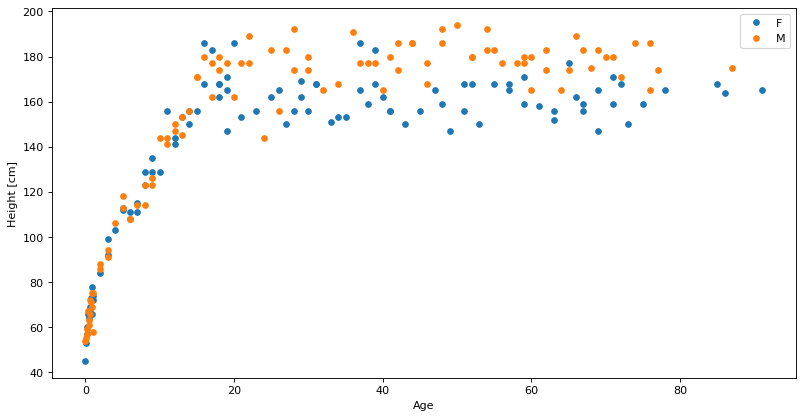

In [70]:
figure(figsize=(12, 6), dpi=80)

groups = df.groupby('Gender')
for name, group in groups:
    plt.plot(group.Age, group.Height, marker='o', linestyle='', markersize=5, label=name)

plt.xlabel("Age")
plt.ylabel("Height [cm]")
plt.legend()

In [71]:
df.head()

,Age,Gender,Height
0,0.000000,M,54
1,0.000000,F,45
2,0.083333,M,55
3,0.083333,F,53
4,0.166667,M,57


In [72]:
df

,Age,Gender,Height
0,0.000000,M,54
1,0.000000,F,45
2,0.083333,M,55
3,0.083333,F,53
4,0.166667,M,57
...,...,...,...
195,78.000000,F,165
196,85.000000,F,168
197,86.000000,F,164
198,87.000000,M,175


In [73]:
gender_variables = pd.get_dummies(df["Gender"])
df = pd.concat([df["Age"], gender_variables, df["Height"]], axis=1)

In [74]:
df

,Age,F,M,Height
0,0.000000,False,True,54
1,0.000000,True,False,45
2,0.083333,False,True,55
3,0.083333,True,False,53
4,0.166667,False,True,57
...,...,...,...,...
195,78.000000,True,False,165
196,85.000000,True,False,168
197,86.000000,True,False,164
198,87.000000,False,True,175
